In [68]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import silhouette_score



print(os.getcwd())

C:\Users\u0166657\Workspace\Diplo-datos\repositorio\DiploDataScienceG7\Mauri\TP3


In [2]:
df = pd.read_csv('./preprocessed_dataset.csv', index_col=0)
new_df = pd.DataFrame()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116191 entries, 0 to 116580
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116191 non-null  object 
 1   customer_id                    116191 non-null  object 
 2   order_status                   116191 non-null  object 
 3   order_purchase_timestamp       116191 non-null  object 
 4   order_approved_at              116191 non-null  object 
 5   order_delivered_carrier_date   116191 non-null  object 
 6   order_delivered_customer_date  116191 non-null  object 
 7   order_estimated_delivery_date  116191 non-null  object 
 8   order_item_id                  116191 non-null  int64  
 9   product_id                     116191 non-null  object 
 10  seller_id                      116191 non-null  object 
 11  shipping_limit_date            116191 non-null  object 
 12  price                         

#### Construimos un dataset nuevo agrupando por customer_id para obtener datos solamente del cliente

In [4]:
by_customer_id = df.groupby(["customer_id"])


In [5]:
new_df['total_payment_value'] = by_customer_id["payment_value"].apply(sum)


In [6]:
new_df.reset_index()

,customer_id,total_payment_value
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
96939,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
96940,fffecc9f79fd8c764f843e9951b11341,81.36
96941,fffeda5b6d849fbd39689bb92087f431,63.13
96942,ffff42319e9b2d713724ae527742af25,214.13


In [7]:
new_df['total_buys'] = by_customer_id['customer_id'].apply(pd.Series.count)

In [8]:
new_df.loc['00012a2ce6f8dcda20d059ce98491703']

total_payment_value    114.74
total_buys               1.00
Name: 00012a2ce6f8dcda20d059ce98491703, dtype: float64

In [9]:
new_df['prefered_payment_type'] = by_customer_id['payment_type'].apply(lambda x:x.mode()[0])

In [10]:
new_df['prefered_payment_installments'] = by_customer_id['payment_installments'].apply(lambda x:x.mode()[0])

In [11]:
new_df['mean_review_score'] = by_customer_id['review_score'].apply(pd.Series.mean)

In [12]:
new_df['mean_products_photos_qty'] = by_customer_id['product_photos_qty'].apply(pd.Series.mean)

In [13]:
new_df['n_different_bought_products'] =  by_customer_id['payment_type'].apply(pd.Series.nunique)

In [14]:
new_df['mean_products_volume'] = by_customer_id['product_volume'].apply(pd.Series.mean)

In [15]:
new_df['mean_products_weight_g'] = by_customer_id['product_weight_g'].apply(pd.Series.mean)

In [16]:
new_df.to_csv('./new_df.csv')

In [17]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english', 'Month_order',
       'order_process_time', 'order_delivery_time', 'order_accuracy_time',
       'order_approv

In [18]:
df.product_category_name_english.value_counts(normalize=True)

bed_bath_table               0.103123
health_beauty                0.085893
sports_leisure               0.077338
furniture_decor              0.075316
computers_accessories        0.069945
                               ...   
arts_and_craftmanship        0.000207
la_cuisine                   0.000138
cds_dvds_musicals            0.000120
fashion_childrens_clothes    0.000069
security_and_services        0.000017
Name: product_category_name_english, Length: 71, dtype: float64

In [19]:
#customer_state(4 categorias, primeras 3 mas otros)
new_df['mean_customer_state'] = by_customer_id['customer_state'].apply(lambda x:x.mode()[0])

customer_state_list=['SP','RJ','MG']
def customer_state_truncate(x):
    if x not in customer_state_list :
        return 'OTROS'
    else:
        return x


new_df['mean_customer_state'] = new_df['mean_customer_state'].apply(lambda row: customer_state_truncate(row))

In [20]:
#seller_state(4 categorias, primeras 3 mas otros)
new_df['mean_seller_state'] = by_customer_id['seller_state'].apply(lambda x:x.mode()[0])

seller_state_list=['SP','PR','MG']
def seller_state_truncate(x):
    if x not in seller_state_list :
        return 'OTROS'
    else:
        return x

new_df['mean_seller_state'] = new_df['mean_seller_state'].apply(lambda row: seller_state_truncate(row))

In [21]:
#mean_order_process_time
new_df['mean_order_process_time'] = by_customer_id['order_process_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_process_time'] = pd.to_timedelta(new_df['mean_order_process_time'],unit='S')
new_df['mean_order_process_days'] = new_df['mean_order_process_time'].dt.days 
new_df['mean_order_process_hour_minute'] = new_df['mean_order_process_time'].dt.components.hours.astype(str) + new_df['mean_order_process_time'].dt.components.minutes.astype(str)

In [22]:
#mean_order_delivery_time
new_df['mean_order_delivery_time'] = by_customer_id['order_delivery_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_delivery_time'] = pd.to_timedelta(new_df['mean_order_delivery_time'],unit='S')
new_df['mean_order_delivery_days'] = new_df['mean_order_delivery_time'].dt.days
new_df['mean_order_delivery_hour_minute'] = new_df['mean_order_delivery_time'].dt.components.hours + new_df['mean_order_delivery_time'].dt.components.minutes

In [23]:
#mean_order_accuracy_time
new_df['mean_order_accuracy_time'] = by_customer_id['order_accuracy_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_accuracy_time'] = pd.to_timedelta(new_df['mean_order_accuracy_time'],unit='S')
new_df['mean_order_accuracy_days'] = new_df['mean_order_accuracy_time'].dt.days
new_df['mean_order_accuracy_hour_minute'] = new_df['mean_order_accuracy_time'].dt.components.hours + new_df['mean_order_accuracy_time'].dt.components.minutes

In [24]:
#mean_order_approved_time'
new_df['mean_order_approved_time'] = by_customer_id['order_approved_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_approved_time'] = pd.to_timedelta(new_df['mean_order_approved_time'],unit='S')
new_df['mean_order_approved_days'] = new_df['mean_order_approved_time'].dt.days
new_df['mean_order_approved_hour_minute'] = new_df['mean_order_approved_time'].dt.components.hours + new_df['mean_order_approved_time'].dt.components.minutes

In [25]:
new_df.columns

Index(['total_payment_value', 'total_buys', 'prefered_payment_type',
       'prefered_payment_installments', 'mean_review_score',
       'mean_products_photos_qty', 'n_different_bought_products',
       'mean_products_volume', 'mean_products_weight_g', 'mean_customer_state',
       'mean_seller_state', 'mean_order_process_time',
       'mean_order_process_days', 'mean_order_process_hour_minute',
       'mean_order_delivery_time', 'mean_order_delivery_days',
       'mean_order_delivery_hour_minute', 'mean_order_accuracy_time',
       'mean_order_accuracy_days', 'mean_order_accuracy_hour_minute',
       'mean_order_approved_time', 'mean_order_approved_days',
       'mean_order_approved_hour_minute'],
      dtype='object')

In [26]:
new_df.drop(['mean_order_process_time','mean_order_delivery_time','mean_order_accuracy_time', 'mean_order_approved_time'], axis='columns', inplace=True)

### Tratamiento de Outliers

In [27]:
new_df.describe()

,total_payment_value,total_buys,prefered_payment_installments,mean_review_score,mean_products_photos_qty,n_different_bought_products,mean_products_volume,mean_products_weight_g,mean_order_process_days,mean_order_delivery_days,mean_order_delivery_hour_minute,mean_order_accuracy_days,mean_order_accuracy_hour_minute,mean_order_approved_days,mean_order_approved_hour_minute
count,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000
mean,207.138952,1.198537,2.903883,4.093551,2.249135,1.022549,15256.788955,2108.019929,12.015463,8.850512,39.821072,10.888606,35.626836,0.264823,24.366180
std,626.445194,0.751232,2.704329,1.339103,1.739502,0.148462,23386.142592,3758.330376,9.450100,8.665194,19.200122,10.113564,17.810162,0.762466,18.361404
min,9.590000,1.000000,0.000000,1.000000,1.000000,1.000000,168.000000,0.000000,0.000000,-17.000000,0.000000,-189.000000,0.000000,0.000000,0.000000
25%,63.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2816.000000,300.000000,6.000000,4.000000,25.000000,6.000000,21.000000,0.000000,12.000000
50%,110.000000,1.000000,2.000000,5.000000,2.000000,1.000000,6480.000000,700.000000,10.000000,7.000000,39.000000,11.000000,35.000000,0.000000,17.000000
75%,197.020000,1.000000,4.000000,5.000000,3.000000,1.000000,18414.000000,1825.000000,15.000000,11.000000,55.000000,16.000000,50.000000,0.000000,33.000000
max,109312.640000,63.000000,24.000000,5.000000,20.000000,2.000000,296208.000000,40425.000000,209.000000,205.000000,82.000000,146.000000,82.000000,60.000000,82.000000


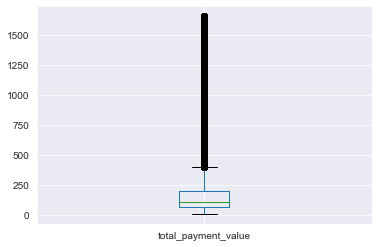

In [28]:
new_df.loc[new_df['total_payment_value']>new_df['total_payment_value'].quantile(0.99),'total_payment_value'] = new_df['total_payment_value'].quantile(0.99)
new_df.boxplot(['total_payment_value'])

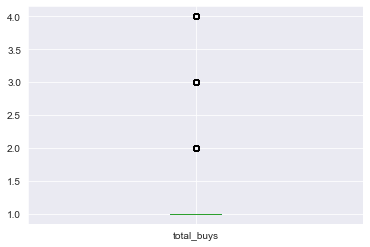

In [29]:
new_df.loc[new_df['total_buys']>new_df['total_buys'].quantile(0.99),'total_buys'] = new_df['total_buys'].quantile(0.99)
new_df.boxplot(['total_buys'])

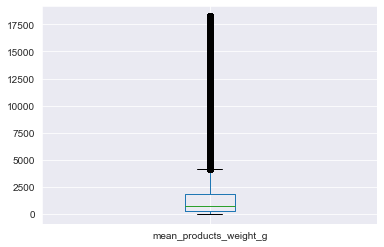

In [30]:
new_df.loc[new_df['mean_products_weight_g']>new_df['mean_products_weight_g'].quantile(0.99),'mean_products_weight_g'] = new_df['mean_products_weight_g'].quantile(0.99)
new_df.boxplot(['mean_products_weight_g'])


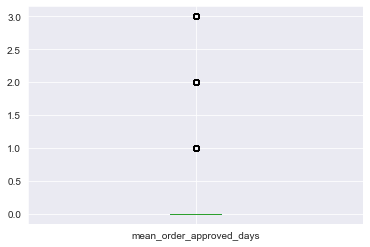

In [31]:
new_df.loc[new_df['mean_order_approved_days']>new_df['mean_order_approved_days'].quantile(0.99),'mean_order_approved_days'] = new_df['mean_order_approved_days'].quantile(0.99)
new_df.boxplot(['mean_order_approved_days'])

In [32]:
new_df.to_pickle('my_pickle.pkl') 

In [33]:
import pandas as pd

In [118]:
new_df = pd.read_pickle('my_pickle.pkl')

In [119]:
new_df.reset_index()

,customer_id,total_payment_value,total_buys,prefered_payment_type,prefered_payment_installments,mean_review_score,mean_products_photos_qty,n_different_bought_products,mean_products_volume,mean_products_weight_g,mean_customer_state,mean_seller_state,mean_order_process_days,mean_order_process_hour_minute,mean_order_delivery_days,mean_order_delivery_hour_minute,mean_order_accuracy_days,mean_order_accuracy_hour_minute,mean_order_approved_days,mean_order_approved_hour_minute
0,00012a2ce6f8dcda20d059ce98491703,114.74,1.0,credit_card,8,1.0,1.0,1,39468.0,4267.0,SP,SP,13,2333,11,9,5,26,0.0,27
1,000161a058600d5901f007fab4c27140,67.41,1.0,credit_card,5,4.0,2.0,1,352.0,150.0,MG,MG,9,917,5,70,9,7,0.0,14
2,0001fd6190edaaf884bcaf3d49edf079,195.42,1.0,credit_card,10,5.0,2.0,1,16905.0,750.0,OTROS,OTROS,5,2151,4,50,15,17,0.0,8
3,0002414f95344307404f0ace7a26f1d5,179.35,1.0,boleto,1,5.0,1.0,1,28800.0,1600.0,MG,OTROS,28,656,25,39,0,56,0.0,15
4,000379cdec625522490c315e70c7a9fb,107.01,1.0,boleto,1,4.0,2.0,1,15300.0,800.0,SP,SP,11,638,9,11,4,41,1.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96939,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,1.0,credit_card,6,5.0,1.0,1,3080.0,1250.0,SP,SP,4,1829,4,26,14,39,0.0,39
96940,fffecc9f79fd8c764f843e9951b11341,81.36,3.0,voucher,1,3.0,3.0,2,20000.0,2050.0,OTROS,SP,12,021,10,53,16,45,0.0,11
96941,fffeda5b6d849fbd39689bb92087f431,63.13,1.0,credit_card,3,4.0,4.0,1,12000.0,350.0,RJ,SP,17,427,14,42,20,61,0.0,18
96942,ffff42319e9b2d713724ae527742af25,214.13,1.0,credit_card,2,5.0,1.0,1,11808.0,2700.0,SP,SP,5,136,2,64,6,31,0.0,23


#### Usamos Label Encoding para convertir las variables categoricas a numericas.

In [120]:
encoder = preprocessing.LabelEncoder()
new_df["prefered_payment_type_n"] = encoder.fit_transform(new_df["prefered_payment_type"].fillna('Nan'))
new_df["mean_customer_state_n"] = encoder.fit_transform(new_df["mean_customer_state"].fillna('Nan'))
new_df["mean_seller_state_n"] = encoder.fit_transform(new_df["mean_seller_state"].fillna('Nan'))

new_df.drop(labels=["prefered_payment_type","mean_customer_state","mean_seller_state"],inplace=True,axis=1)
new_df.head()

,total_payment_value,total_buys,prefered_payment_installments,mean_review_score,mean_products_photos_qty,n_different_bought_products,mean_products_volume,mean_products_weight_g,mean_order_process_days,mean_order_process_hour_minute,mean_order_delivery_days,mean_order_delivery_hour_minute,mean_order_accuracy_days,mean_order_accuracy_hour_minute,mean_order_approved_days,mean_order_approved_hour_minute,prefered_payment_type_n,mean_customer_state_n,mean_seller_state_n
customer_id,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,114.74,1.0,8,1.0,1.0,1,39468.0,4267.0,13,2333,11,9,5,26,0.0,27,1,3,3
000161a058600d5901f007fab4c27140,67.41,1.0,5,4.0,2.0,1,352.0,150.0,9,917,5,70,9,7,0.0,14,1,0,0
0001fd6190edaaf884bcaf3d49edf079,195.42,1.0,10,5.0,2.0,1,16905.0,750.0,5,2151,4,50,15,17,0.0,8,1,1,1
0002414f95344307404f0ace7a26f1d5,179.35,1.0,1,5.0,1.0,1,28800.0,1600.0,28,656,25,39,0,56,0.0,15,0,0,1
000379cdec625522490c315e70c7a9fb,107.01,1.0,1,4.0,2.0,1,15300.0,800.0,11,638,9,11,4,41,1.0,41,0,3,3


#### Escalamos el dataset con mean = 0 y std =1

In [61]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new_df)
df_scaled=pd.DataFrame(df_scaled)
df_scaled.columns = new_df.columns
df_scaled.head()

,total_payment_value,total_buys,prefered_payment_installments,mean_review_score,mean_products_photos_qty,n_different_bought_products,mean_products_volume,mean_products_weight_g,mean_order_process_days,mean_order_process_hour_minute,mean_order_delivery_days,mean_order_delivery_hour_minute,mean_order_accuracy_days,mean_order_accuracy_hour_minute,mean_order_approved_days,mean_order_approved_hour_minute,prefered_payment_type_n,mean_customer_state_n,mean_seller_state_n
0,-0.294659,-0.341327,1.884439,-2.310178,-0.718103,-0.151886,1.035286,0.652756,0.104183,1.745167,0.248061,-1.605262,-0.582251,-0.540528,-0.403464,0.143444,0.278608,1.048407,0.589181
1,-0.484269,-0.341327,0.775101,-0.069861,-0.143223,-0.151886,-0.637338,-0.557499,-0.319095,-0.033016,-0.444368,1.571817,-0.186741,-1.607340,-0.403464,-0.564567,0.278608,-1.690637,-2.427060
2,0.028555,-0.341327,2.623998,0.676911,-0.143223,-0.151886,0.070478,-0.381120,-0.742373,1.516616,-0.559772,0.530152,0.406525,-1.045860,-0.403464,-0.891341,0.278608,-0.777622,-1.421646
3,-0.035823,-0.341327,-0.704017,0.676911,-0.718103,-0.151886,0.579116,-0.131249,1.691476,-0.360774,1.863729,-0.042764,-1.076639,1.143913,-0.403464,-0.510104,-1.643633,-1.690637,-1.421646
4,-0.325627,-0.341327,-0.704017,-0.069861,-0.143223,-0.151886,0.001848,-0.366422,-0.107456,-0.383378,0.017252,-1.501096,-0.681129,0.301692,1.219498,0.905917,-1.643633,1.048407,0.589181


#### Analizamos la correlacion entre las variables del dataset.

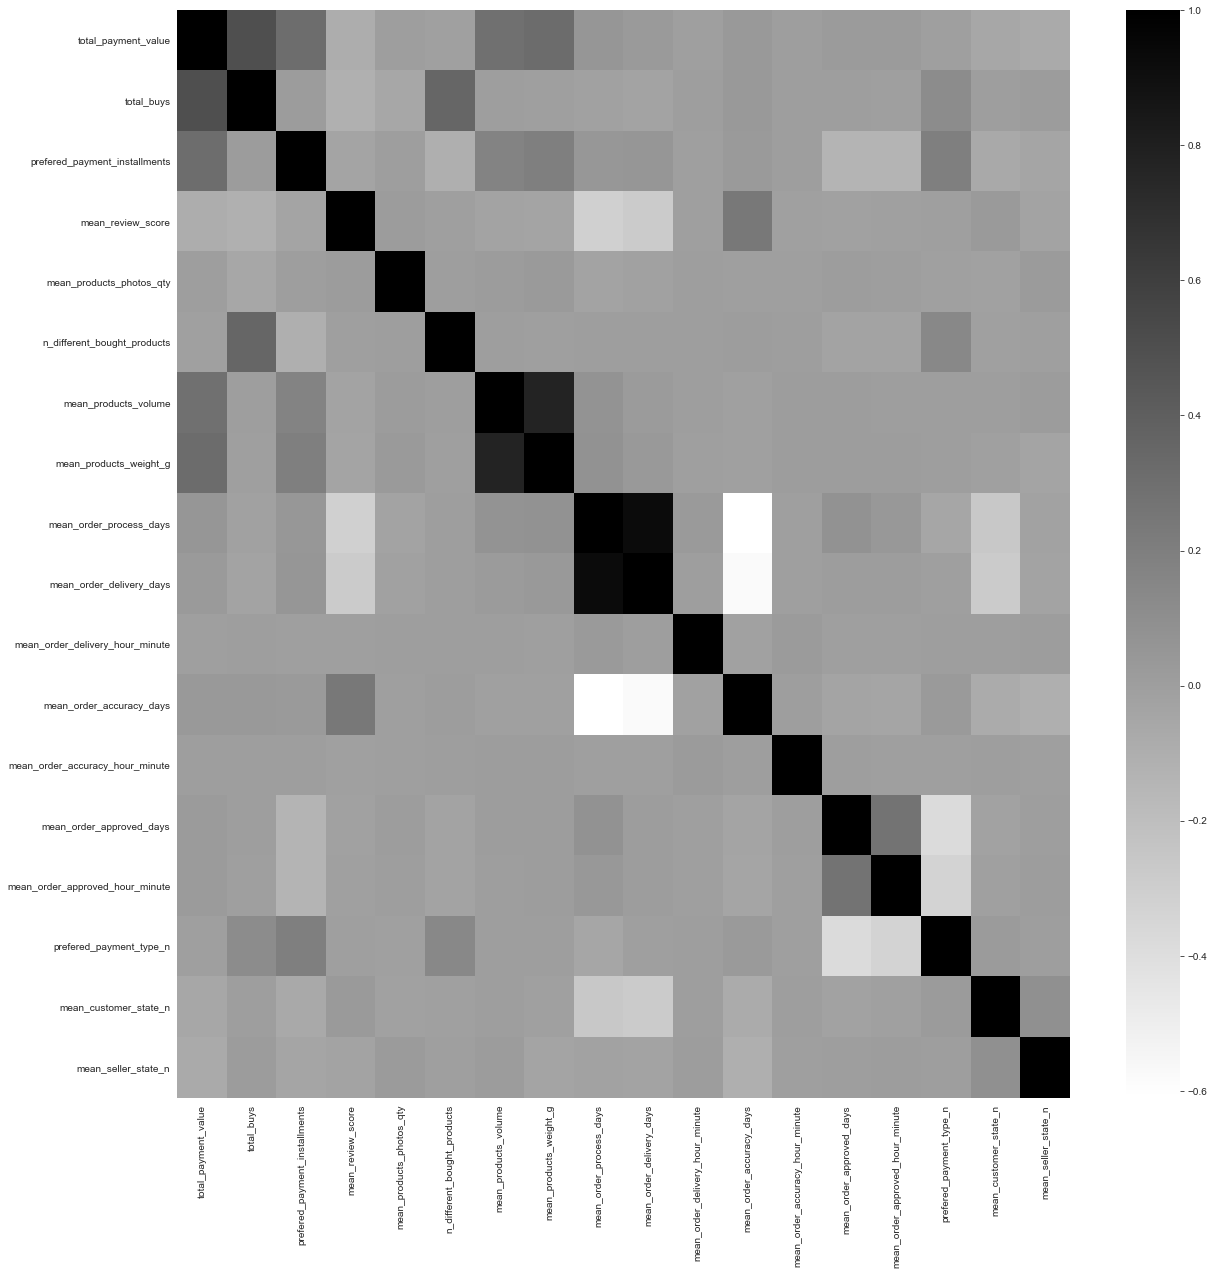

In [156]:
fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(data=new_df.corr(), cmap='binary')

### Buscamos K

In [121]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [122]:
Nc = range(1, 21) # pruebo con 1 cluster, 2 clusters... 20 clusters
# creo los kmeans
kmeans = []
for i in Nc:
    kmeans.append(KMeans(n_clusters=i))

kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19),
 KMeans(n_clusters=20)]

#### Elegimos variables para clusterizar, en este caso utilizamos 5.

In [123]:
X = new_df[['mean_products_photos_qty','mean_customer_state_n','mean_review_score','total_payment_value','prefered_payment_type_n']]

In [124]:
# ejecuto kmeans con cada uno de los clusters
X = X.sample(frac=0.05)
score = [None] * 20

for i in range(len(kmeans)):
    score[i] = (kmeans[i].fit(X).inertia_)  #score(X))
    
# score nos da 0 si los elementos son muy parecidos, o el "opuesto" al objetivo de kmeans (minimizar distancia)
    

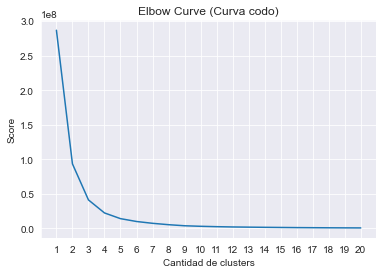

In [125]:
plt.plot(Nc,score)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve (Curva codo)')
plt.xticks(Nc)
plt.show()

#### Metodo de la silueta

In [126]:
sil = []
Nc = range(2, 11)
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

sil

[0.8277846186699992,
 0.7404733693271301,
 0.6423335577631044,
 0.6043133673960661,
 0.604524914369126,
 0.5858277391363128,
 0.5700756752150113,
 0.5742615527441687,
 0.5541666577875415]

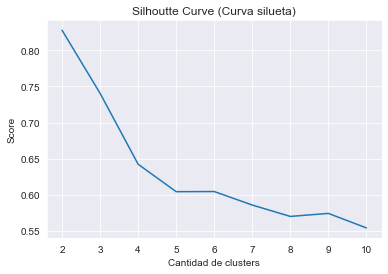

In [127]:
plt.plot(Nc,sil)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score')
plt.title('Silhoutte Curve (Curva silueta)')
plt.xticks(Nc)
plt.show()

Concluimos en que utilizaremos 3 o 4 clusters

#### Utilizando 4 clusters

In [129]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.28550767e+00 1.86288690e+00 4.12332466e+00 8.77289933e+01
  8.38588371e-01]
 [2.34035088e+00 1.75438596e+00 3.82105263e+00 6.70967509e+02
  8.14035088e-01]
 [2.27184306e+00 1.82096934e+00 3.96538081e+00 2.73021128e+02
  8.80316518e-01]
 [2.30496454e+00 1.93617021e+00 3.56914894e+00 1.47535085e+03
  8.51063830e-01]]


In [ ]:
X_buffer = X.values
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

#### Graficamos los 4 clusters diferenciando por 'mean_products_photos_qty','mean_customer_state_n','mean_review_score'

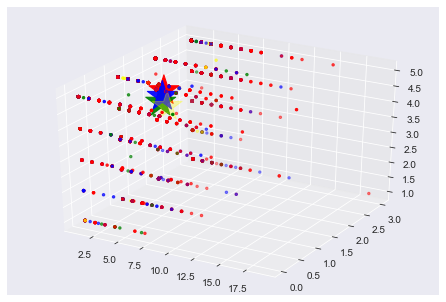

In [146]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_buffer[:, 0], X_buffer[:, 1], X_buffer[:, 2], c=asignar,s=6)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

#### Graficamos los 4 clusters diferenciando por 'prefered_payment_type_n', 'total_payment_value', 'mean_review_score'

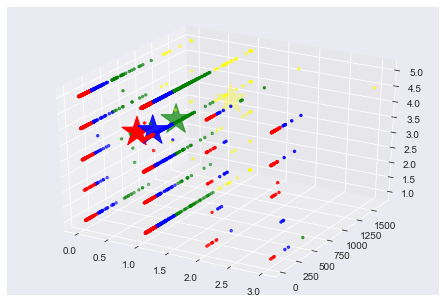

In [145]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_buffer[:, 4], X_buffer[:, 3], X_buffer[:, 2], c=asignar,s=6)
ax.scatter(C[:, 4], C[:, 3], C[:, 2], marker='*', c=colores, s=1000)


#### Graficamos en 2 dimensiones con respecto a la variable "total_payment_value"

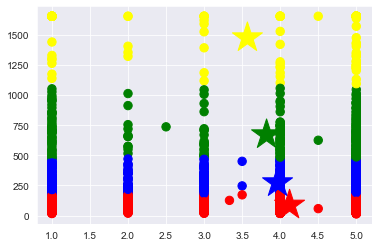

In [153]:
f1 = X['mean_review_score'].values
f2 = X['total_payment_value'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.show()

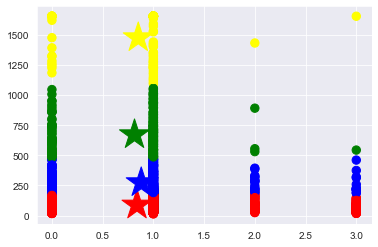

In [154]:
f1 = X['prefered_payment_type_n'].values
f2 = X['total_payment_value'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 4], C[:, 3], marker='*', c=colores, s=1000)
plt.show()

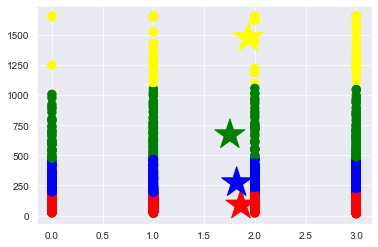

In [155]:
f1 = X['mean_customer_state_n'].values
f2 = X['total_payment_value'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 3], marker='*', c=colores, s=1000)
plt.show()